## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Need to Change Local Paths below for GitHub!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
la_file = '/content/drive/MyDrive/CS506/CS506_FINAL/LA_moon_weather.csv'
boston_file = '/content/drive/MyDrive/CS506/CS506_FINAL/Boston_moon_weather.csv'
chicago_file = '/content/drive/MyDrive/CS506/CS506_FINAL/Chicago_moon_weather.csv'
moon_data_file = #TODO

# Load the datasets
la_data = pd.read_csv(la_file)
boston_data = pd.read_csv(boston_file)
chicago_data = pd.read_csv(chicago_file)
moon_data = pd.read_csv(moon_data_file)

#### Add Moon Phases for Moon Dataset

In [ ]:
#TODO

### Add missing moon phases

In [ ]:
moon_phases = [
    'New Moon', 'Waxing Crescent', 'First Quarter', 'Waxing Gibbous',
    'Full Moon', 'Waning Gibbous', 'Last Quarter', 'Waning Crescent', 'New Moon'
]

# Function to interpolate moon phases
def fill_moon_phases(df, phase_column):
    known_phases = df[phase_column].dropna()

    # If there are no missing values, return the dataframe as is
    if known_phases.empty:
        return df

    # Map phases to numeric indices for interpolation
    phase_to_index = {phase: idx for idx, phase in enumerate(moon_phases)}
    index_to_phase = {idx: phase for idx, phase in enumerate(moon_phases)}

    numeric_indices = known_phases.map(phase_to_index)
    interpolated_indices = numeric_indices.reindex(df.index).interpolate(method='linear', limit_direction='forward')
    interpolated_indices = interpolated_indices.fillna(method='bfill').fillna(method='ffill') #Handle Nan and filling
    interpolated_indices = interpolated_indices.round().astype(int)  # Round to nearest whole number

    df[phase_column] = interpolated_indices.map(index_to_phase)
    return df

### Combine Cities

In [ ]:
city_files = [
    (la_file, {'LA': 1, 'Boston': 0, 'Chicago': 0}),
    (boston_file, {'LA': 0, 'Boston': 1, 'Chicago': 0}),
    (chicago_file, {'LA': 0, 'Boston': 0, 'Chicago': 1})
]

processed_data = []

# Process each city's data
for city_file, indicators in city_files:
    city_data = pd.read_csv(city_file)

    # Fill in the missing "Phase" values
    city_data = fill_moon_phases(city_data, 'Phase')

    # Add city indicator columns
    for city, value in indicators.items():
        city_data[city] = value

    processed_data.append(city_data)

data = pd.concat(processed_data)
data.head()

<ipython-input-54-7730f1f7fb0a>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolated_indices = interpolated_indices.fillna(method='bfill').fillna(method='ffill') #Handle Nan and filling
<ipython-input-54-7730f1f7fb0a>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolated_indices = interpolated_indices.fillna(method='bfill').fillna(method='ffill') #Handle Nan and filling
<ipython-input-54-7730f1f7fb0a>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolated_indices = interpolated_indices.fillna(method='bfill').fillna(method='ffill') #Handle Nan and filling


,Date,weather_code,max_temp,min_temp,mean_temp,apparent_max_temp,apparent_min_temp,mean_apparent_temp,sunrise (iso8601),sunset (iso8601),...,wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),reference_evapotransiration (mm),Phase,Time (UT),range_temp,range_apparent_temp,LA,Boston,Chicago
0,2019-10-29,0,74.3,50.0,61.4,69.2,42.6,55.5,2019-10-29 14:09:00,2019-10-30 01:03:00,...,109,16.07,3.92,First Quarter,NaN,24.3,26.6,1,0,0
1,2019-10-30,0,76.2,49.1,61.4,68.6,43.7,57.4,2019-10-30 14:10:00,2019-10-31 01:02:00,...,198,16.89,3.23,First Quarter,NaN,27.1,24.9,1,0,0
2,2019-10-31,0,77.7,42.6,58.3,70.5,34.0,50.2,2019-10-31 14:11:00,2019-11-01 01:01:00,...,35,17.16,3.83,First Quarter,NaN,35.1,36.5,1,0,0
3,2019-11-01,0,81.8,49.1,62.8,75.4,40.2,55.0,2019-11-01 14:12:00,2019-11-02 01:00:00,...,358,16.88,3.98,First Quarter,NaN,32.7,35.2,1,0,0
4,2019-11-02,2,84.5,56.9,66.8,77.5,48.7,60.0,2019-11-02 14:13:00,2019-11-03 00:59:00,...,343,15.49,3.77,First Quarter,NaN,27.6,28.8,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5484 entries, 0 to 1827
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              5484 non-null   object 
 1   weather_code                      5484 non-null   int64  
 2   max_temp                          5484 non-null   float64
 3   min_temp                          5484 non-null   float64
 4   mean_temp                         5484 non-null   float64
 5   apparent_max_temp                 5484 non-null   float64
 6   apparent_min_temp                 5484 non-null   float64
 7   mean_apparent_temp                5484 non-null   float64
 8   sunrise (iso8601)                 5484 non-null   object 
 9   sunset (iso8601)                  5484 non-null   object 
 10  daylight_duration (s)             5484 non-null   float64
 11  sunshine_duration (s)             5484 non-null   float64
 12  precipitati

In [ ]:
# Ensure the 'Date' column contains only the year
data['Year'] = pd.to_datetime(data['Date']).dt.year.astype('int64')

# Encode 'Phase' into numerical values
phase_mapping = {phase: idx for idx, phase in enumerate(moon_phases)}
data['Phase_encoded'] = data['Phase'].map(phase_mapping)

# Drop non-numeric columns (from inital understanding)
columns_to_drop = ['Phase', 'Date', 'apparent_max_temp', 'apparent_min_temp',
                   'mean_apparent_temp', 'range_apparent_temp']
data = data.drop(columns=columns_to_drop).select_dtypes(include=['float64', 'int64'])
data.head()

,weather_code,max_temp,min_temp,mean_temp,daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),...,wind_gusts_10m_max (mp/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),reference_evapotransiration (mm),range_temp,LA,Boston,Chicago,Year,Phase_encoded
0,0,74.3,50.0,61.4,39244.35,36228.99,0.0,0.0,0.0,0,...,19.0,109,16.07,3.92,24.3,1,0,0,2019,2
1,0,76.2,49.1,61.4,39130.75,36108.10,0.0,0.0,0.0,0,...,16.3,198,16.89,3.23,27.1,1,0,0,2019,2
2,0,77.7,42.6,58.3,39017.64,35987.52,0.0,0.0,0.0,0,...,18.6,35,17.16,3.83,35.1,1,0,0,2019,2
3,0,81.8,49.1,62.8,38905.09,35867.36,0.0,0.0,0.0,0,...,14.5,358,16.88,3.98,32.7,1,0,0,2019,2
4,2,84.5,56.9,66.8,38793.24,35122.29,0.0,0.0,0.0,0,...,15.2,343,15.49,3.77,27.6,1,0,0,2019,2


### Feature Selection (Drop more columns)

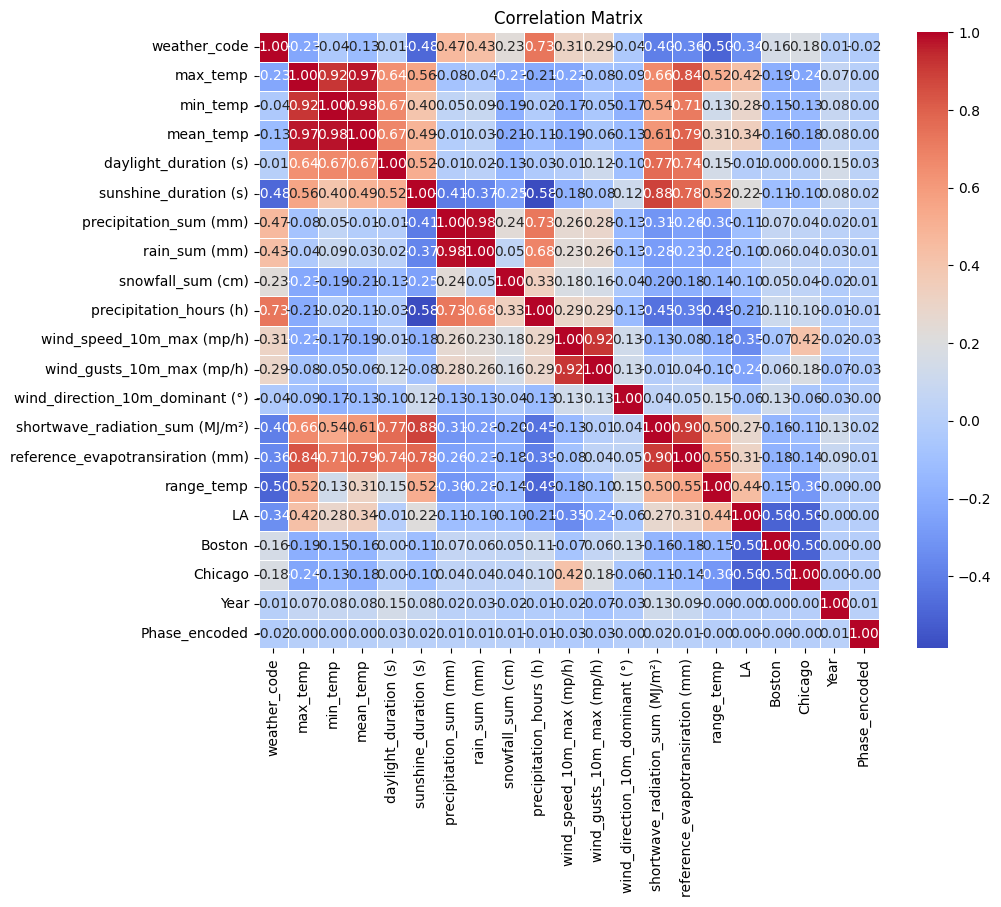

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

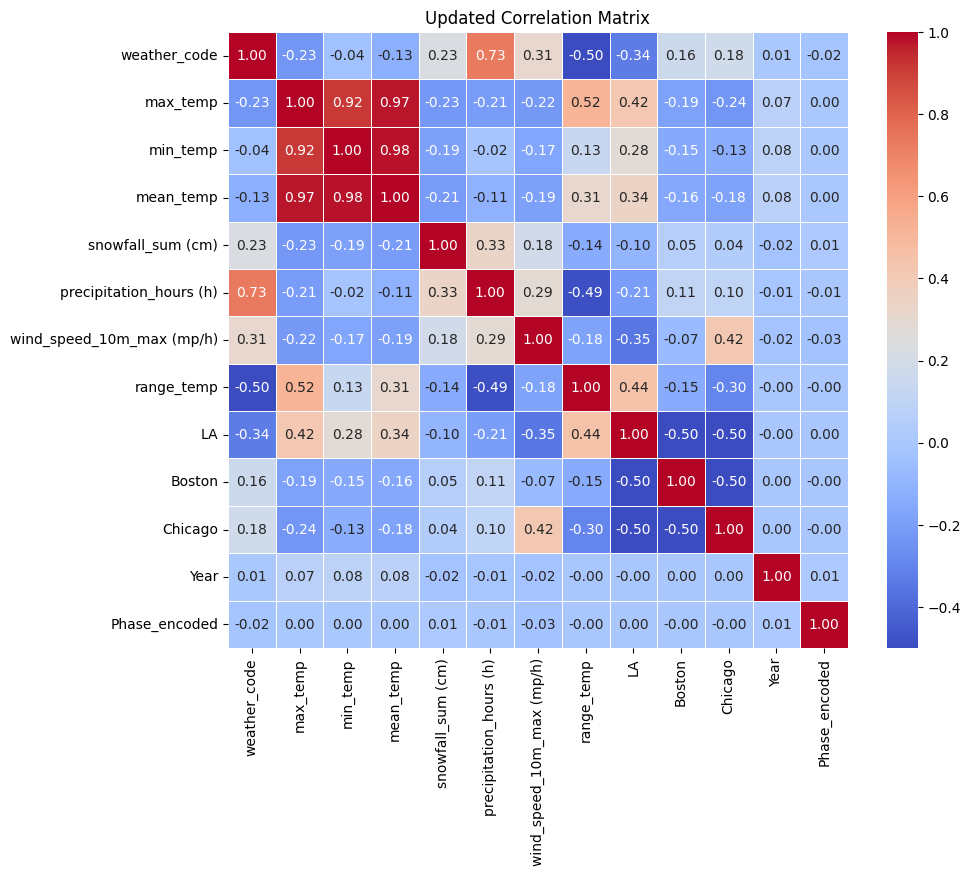

In [ ]:
# Additional columns to drop based on correlation analysis
# Because they correlate to high to the temp, taking away from the Phase
# Or it is redundant (like the wind and rain data)
additional_columns_to_drop = [
    'daylight_duration (s)',
    'sunshine_duration (s)',
    'shortwave_radiation_sum (MJ/m²)',
    'reference_evapotransiration (mm)',
    'wind_gusts_10m_max (mp/h)',
    'wind_direction_10m_dominant (°)',
    'precipitation_sum (mm)',
    'rain_sum (mm)'
]

# Drop the additional columns
data = data.drop(columns=additional_columns_to_drop)

# Compute the updated correlation matrix
updated_correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix")
plt.show()

Right now, we can see that Phases, in general doesn't correlate to any weather data. But we will still try to run a model where it takes it into account.

## Save Cleaned File (change this path too)

In [ ]:
cleaned_file_path = '/content/drive/MyDrive/CS506/CS506_FINAL/cleaned_weather_data.csv'
data.to_csv(cleaned_file_path, index=False)

# Print message when done
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to /content/drive/MyDrive/CS506/CS506_FINAL/cleaned_weather_data.csv
